In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding = "ISO-8859-1")
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.rename(columns={"v1": "Target","v2": "Text"},inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
#If spam then 0, not spam then 1
df["Target"]=(df["Target"]=="ham")*1
df

,Target,Text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
df.duplicated().sum()

403

In [7]:
df=df.drop_duplicates(keep="first")
df

,Target,Text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [8]:
df["Target"].value_counts()

Target
1    4516
0     653
Name: count, dtype: int64

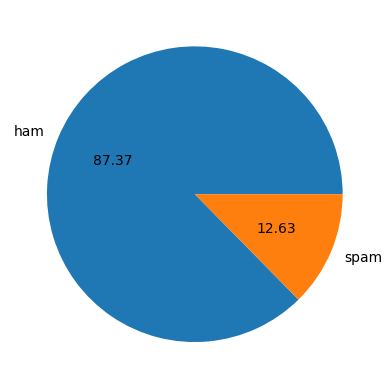

In [9]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f");

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df["Characters"]=df["Text"].apply(len)
df

/tmp/ipykernel_32/2571686146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Characters"]=df["Text"].apply(len)


,Target,Text,Characters
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161
5568,1,Will Ì_ b going to esplanade fr home?,37
5569,1,"Pity, * was in mood for that. So...any other s...",57
5570,1,The guy did some bitching but I acted like i'd...,125


In [12]:
df["Word Count"]=df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))
df

/tmp/ipykernel_32/1972521290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Word Count"]=df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))


,Target,Text,Characters,Word Count
0,1,"Go until jurong point, crazy.. Available only ...",111,23
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35
5568,1,Will Ì_ b going to esplanade fr home?,37,9
5569,1,"Pity, * was in mood for that. So...any other s...",57,15
5570,1,The guy did some bitching but I acted like i'd...,125,27


In [13]:
df["Sentence Count"]=df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df

/tmp/ipykernel_32/3833946722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentence Count"]=df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))


,Target,Text,Characters,Word Count,Sentence Count
0,1,"Go until jurong point, crazy.. Available only ...",111,23,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,1,Will Ì_ b going to esplanade fr home?,37,9,1
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,1,The guy did some bitching but I acted like i'd...,125,27,1


In [14]:
df.describe()

,Target,Characters,Word Count,Sentence Count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.873670,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,1.000000,36.000000,9.000000,1.000000
50%,1.000000,60.000000,15.000000,1.000000
75%,1.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [15]:
import seaborn as sns

<Axes: xlabel='Characters', ylabel='Count'>

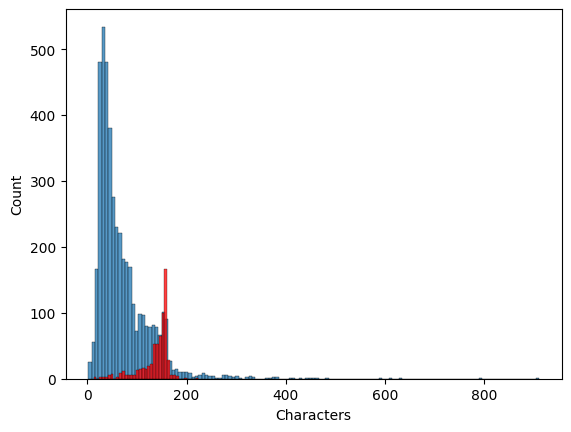

In [16]:
sns.histplot(df[df["Target"]==1]["Characters"])
sns.histplot(df[df["Target"]==0]["Characters"],color="red")

<Axes: xlabel='Word Count', ylabel='Count'>

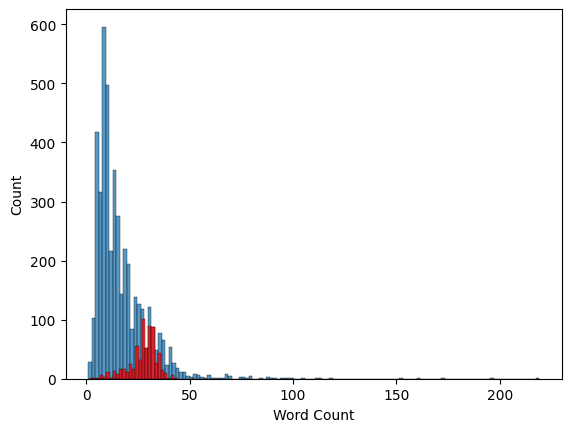

In [17]:
sns.histplot(df[df["Target"]==1]["Word Count"])
sns.histplot(df[df["Target"]==0]["Word Count"],color="red")

<Axes: xlabel='Sentence Count', ylabel='Count'>

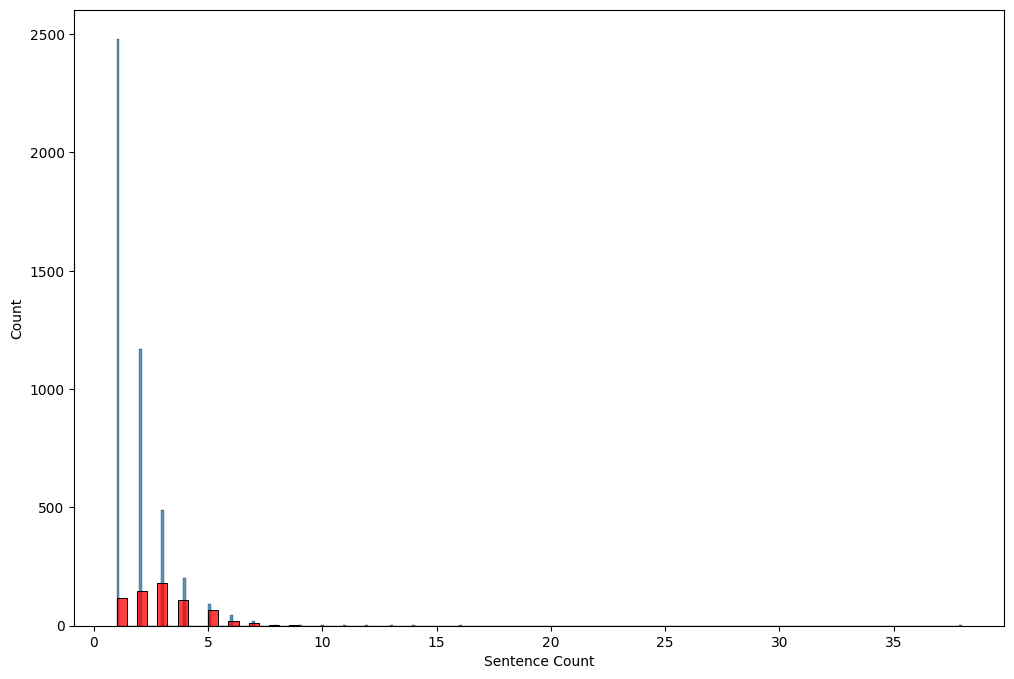

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["Target"]==1]["Sentence Count"])
sns.histplot(df[df["Target"]==0]["Sentence Count"],color="red")

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps=PorterStemmer()
y=stopwords.words('english')
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    x=[]
    for i in text:
        if(i.isalnum()):
            x.append(i)
    text=x[:]
    x.clear()
    for i in text:
        if i not in y and i not in string.punctuation:
            x.append(i)
    text=x[:]
    x.clear()
    for i in text:
        x.append(ps.stem(i))
    text=x[:]
    return " ".join(text)

In [20]:
df["Transformed Text"]=df["Text"].apply(transform)
df

/tmp/ipykernel_32/3782940945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Transformed Text"]=df["Text"].apply(transform)


,Target,Text,Characters,Word Count,Sentence Count,Transformed Text
0,1,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,1,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,1,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [21]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

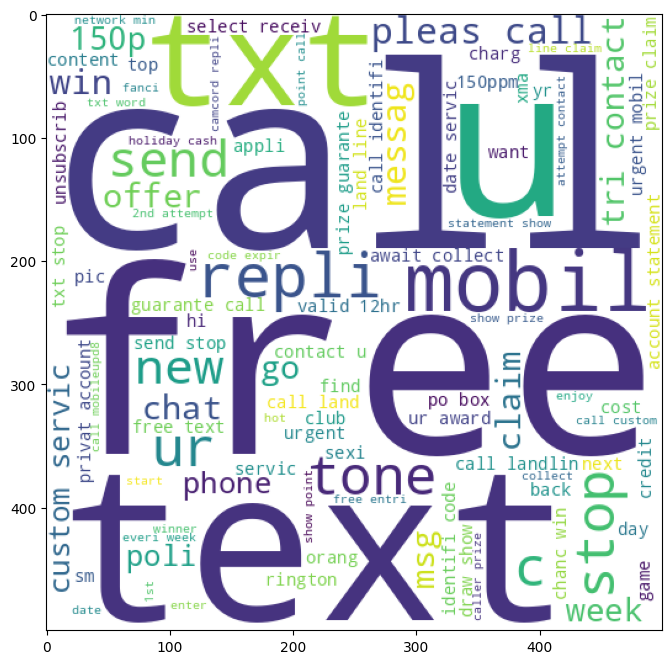

In [22]:
spam_wc=wc.generate(df[df['Target']==0]["Transformed Text"].str.cat(sep=' '))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

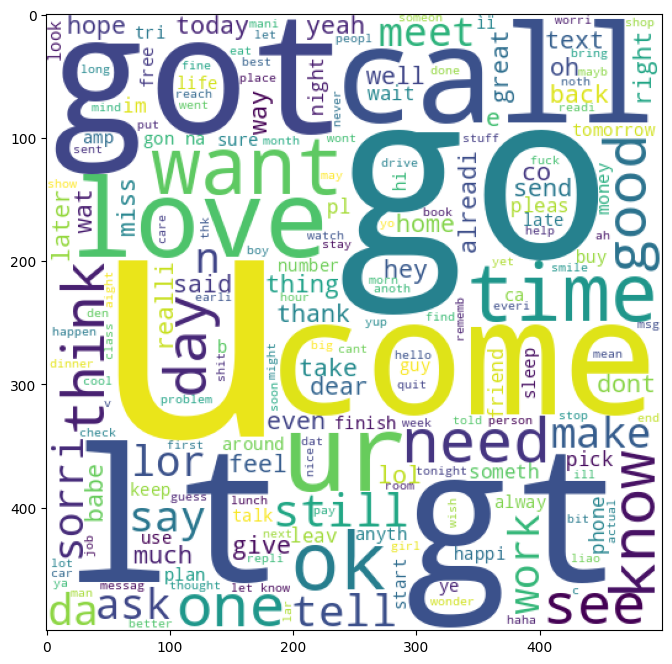

In [23]:
not_spam_wc=wc.generate(df[df['Target']==1]["Transformed Text"].str.cat(sep=' '))
plt.figure(figsize=(12,8))
plt.imshow(not_spam_wc)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [25]:
X=cv.fit_transform(df["Transformed Text"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
X.shape

(5169, 6629)

In [27]:
Y=df["Target"].values
Y

array([1, 1, 0, ..., 1, 1, 1])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [31]:
gnb.fit(X_train,Y_train)
Y_preds1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_preds1))
print(confusion_matrix(Y_test,Y_preds1))
print(precision_score(Y_test,Y_preds1))

0.8597678916827853
[[126  19]
 [126 763]]
0.9757033248081841


In [32]:
mnb.fit(X_train,Y_train)
Y_preds2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_preds2))
print(confusion_matrix(Y_test,Y_preds2))
print(precision_score(Y_test,Y_preds2))

0.9729206963249516
[[134  11]
 [ 17 872]]
0.9875424688561721


In [33]:
bnb.fit(X_train,Y_train)
Y_preds3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_preds3))
print(confusion_matrix(Y_test,Y_preds3))
print(precision_score(Y_test,Y_preds3))

0.9661508704061895
[[114  31]
 [  4 885]]
0.9661572052401747


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [35]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
abc=AdaBoostClassifier(n_estimators=50,random_state=42)
bc=BaggingClassifier(n_estimators=50,random_state=42)
etc=ExtraTreesClassifier(n_estimators=50,random_state=42)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=42)
xgb=XGBClassifier(n_estimators=50,random_state=42)

In [36]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [37]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_preds=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_preds)
    precision=precision_score(Y_test,Y_preds)
    return accuracy,precision

In [38]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.925531914893617, 0.9541387024608501)

In [39]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf, X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.925531914893617
Precision -  0.9541387024608501
For  KN
Accuracy -  0.9032882011605415
Precision -  0.8988877654196158
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9875424688561721
For  DT
Accuracy -  0.9235976789168279
Precision -  0.9227557411273486
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9735391400220507
For  RF
Accuracy -  0.9680851063829787
Precision -  0.9652173913043478
For  AdaBoost
Accuracy -  0.9487427466150871
Precision -  0.965478841870824
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.9668508287292817
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9704918032786886
For  GBDT
Accuracy -  0.9361702127659575
Precision -  0.9419978517722879
For  xgb
Accuracy -  0.9613152804642167
Precision -  0.9711431742508324


In [40]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [41]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.972921,0.987542
4,LR,0.970986,0.973539
10,xgb,0.961315,0.971143
8,ETC,0.972921,0.970492
7,BgC,0.957447,0.966851
6,AdaBoost,0.948743,0.965479
5,RF,0.968085,0.965217
0,SVC,0.925532,0.954139
9,GBDT,0.936170,0.941998
3,DT,0.923598,0.922756


In [43]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))